# Python Spectrophotometry

This is for a school project, please ignore ok ty.

In [2]:
# Clone images from GitHub
!rm -rf python-spectrophotometry
!git clone https://github.com/folfcoder/python-spectrophotometry

Cloning into 'python-spectrophotometry'...
remote: Enumerating objects: 19, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 19 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (19/19), 326.91 KiB | 1.75 MiB/s, done.


In [3]:
# Import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from scipy.stats import norm

In [4]:
# Compute luma
def luma(red, green, blue, cols):
  l = []
  for col in range(cols):
    Y = 0.2126*red[col] + 0.7152*green[col] + 0.0722*blue[col]
    l.append(Y)
  return l


In [5]:
# Plot
def plot(red, green, blue, luma, cols, name):
  lambda_val = np.linspace(start=350, stop=750, num=cols)

  plt.plot(lambda_val, red, 'r', label="Red")
  plt.plot(lambda_val, green, 'g', label="Green")
  plt.plot(lambda_val, blue, 'b', label="Blue")
  plt.plot(lambda_val, luma, '--', label="Luma")
  plt.title(name)
  plt.xlabel('Wavelength (nm)')
  plt.ylabel('Average value per pixel (0-255)')
  plt.legend()
  plt.show()

In [6]:
# Plot (normally distributed curve)
def plot_norm(red, green, blue, luma, cols, name):

  nr, ng, nb = [], [], []
  for c in range(cols):
    nr.extend([c] * int(red[c]))
    ng.extend([c] * int(green[c]))
    nb.extend([c] * int(blue[c]))

  r_norm = norm(np.mean(nr), np.std(nr)).pdf(range(cols))*sum(red)
  g_norm = norm(np.mean(ng), np.std(ng)).pdf(range(cols))*sum(green)
  b_norm = norm(np.mean(nb), np.std(nb)).pdf(range(cols))*sum(blue)

  plot(r_norm, g_norm, b_norm, luma, cols, f'{name}\n(RGB normally distributed)')

In [7]:
# Compute
def compute(img):

  # Get the number of rows and columns of the image
  rows, cols, channels = img.shape

  # Choose a column to sum the R values for
  col_num = 0

  def sum_col(column):
    sum_r, sum_g, sum_b = 0, 0, 0
    # Loop through each row in the column
    for row in range(rows):
        # Get the BGR values for the pixel at the current row and column
        g, b, r = img[row, column]
        
        sum_r += r
        sum_g += g
        sum_b += b
    return sum_r/rows, sum_b/rows, sum_g/rows

  red, green, blue = [], [], []
  # For each column, sum RGB value
  for col in range(cols):
    r, g, b = sum_col(col)
    red.append(r)
    green.append(g)
    blue.append(b)

  return red, green, blue, cols


In [8]:
data =  {
    "Natural Red": "python-spectrophotometry/photo/red_na.png",
    "Artificial Red": "python-spectrophotometry/photo/red_af.png",
    "Natural Green": "python-spectrophotometry/photo/green_na.png",
    "Artificial Green": "python-spectrophotometry/photo/green_af.png"
}

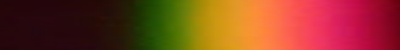

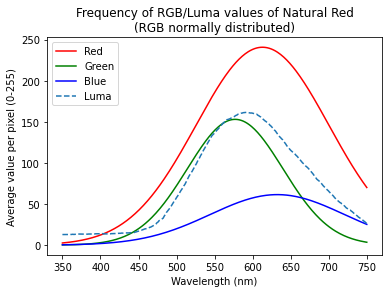

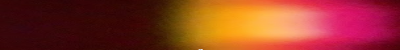

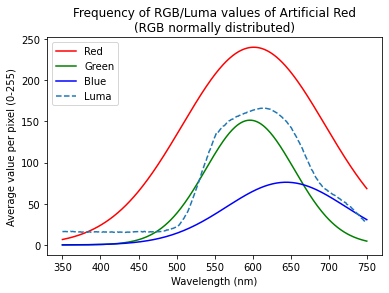

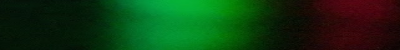

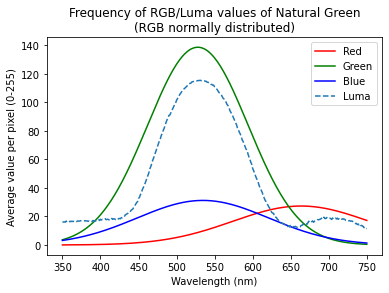

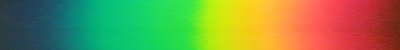

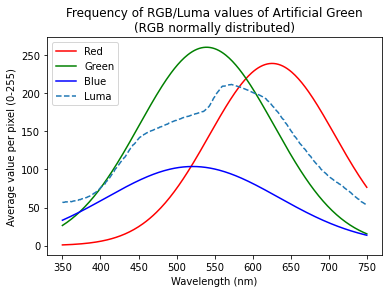

In [9]:
for name, filename in data.items():
  img = cv2.imread(filename, cv2.IMREAD_COLOR)
  img = cv2.flip(img, 1)
  cv2_imshow(cv2.resize(img, (400, 50),
               interpolation = cv2.INTER_LINEAR))
  r,g,b,c = compute(img)
  y = luma(r,g,b,c)
  #plot(r,g,b,y,c, f"Frequency of RGB/Luma values of {name}")
  plot_norm(r,g,b,y,c,f"Frequency of RGB/Luma values of {name}")